# Bike Share Analysis___Google Data Analytics Capstone - Case Study 
    The entire analysis process has been posted on Kaggle. The code on GitHub is for storage.
    https://www.kaggle.com/code/eugunel/google-data-analytics-capstone-case-study-1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
df1 = pd.read_csv('202101-divvy-tripdata.csv', sep = ',')
df2 = pd.read_csv('202102-divvy-tripdata.csv', sep = ',')
df3 = pd.read_csv('202103-divvy-tripdata.csv', sep = ',')
df4 = pd.read_csv('202104-divvy-tripdata.csv', sep = ',')
df5 = pd.read_csv('202105-divvy-tripdata.csv', sep = ',')
df6 = pd.read_csv('202106-divvy-tripdata.csv', sep = ',')
df7 = pd.read_csv('202107-divvy-tripdata.csv', sep = ',')
df8 = pd.read_csv('202108-divvy-tripdata.csv', sep = ',')
df9 = pd.read_csv('202109-divvy-tripdata.csv', sep = ',')
df10 = pd.read_csv('202110-divvy-tripdata.csv', sep = ',')
df11 = pd.read_csv('202111-divvy-tripdata.csv', sep = ',')
df12 = pd.read_csv('202112-divvy-tripdata.csv', sep = ',')

In [7]:
monthly_df_list = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12]

In [8]:
# Caltulate the total rows of data in monthly list
# Check the attributes of each dataset.
total_rows = 0
for month in monthly_df_list:
    total_rows += month.shape[0]
    print(month.columns)   
print(total_rows)

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')


In [9]:
# All dataframes have identical column names. The next step is to merge them vertically.
df_all = pd.concat(monthly_df_list, axis = 0, ignore_index =True)

In [10]:
# To Check the data integrity after combination
assert df_all.shape[0] == total_rows

In [11]:
#df_all.to_csv('2021_shared_bike_data.csv')

# 2. Processed

In [13]:

df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5595063 entries, 0 to 5595062
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 554.9+ MB


In [14]:
# To check for any duplicated data and remove it.
df_all.duplicated().sum()

0

In [15]:
# Types of membership
df_all.member_casual.unique()

array(['member', 'casual'], dtype=object)

In [16]:
df_all.rideable_type.unique()

array(['electric_bike', 'classic_bike', 'docked_bike'], dtype=object)

In [17]:
# Filter out ride_id names by their length. 
# Take a further step and remove the data if the ride_id is not in a consistent format or length

df_all.ride_id.apply(lambda x: len(x)).value_counts()

16    5595063
Name: ride_id, dtype: int64

In [18]:
# To convert the date format to datetime64
df_all.started_at = pd.to_datetime(df_all.started_at)
df_all.ended_at = pd.to_datetime(df_all.ended_at)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5595063 entries, 0 to 5595062
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 554.9+ MB


In [19]:
# Creat a column called "duration_in_mins"
df_all['duration_in_mins'] = (df_all.ended_at - df_all.started_at).dt.total_seconds() / 60
df_all.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration_in_mins
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member,10.416667
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member,4.066667
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member,1.333333
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member,11.700000
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual,0.716667


In [20]:
# To filter out the non-positive values in the duration_in_mins column.
# To drop the rows that have non-positive values in the duration_in_mins column.
filt_index = df_all[df_all.duration_in_mins <= 0].index
filt_index

Int64Index([   6592,   35676,   35752,   60891,   73012,   86200,  105424,
             108853,  114093,  137951,
            ...
            5548087, 5553095, 5553165, 5554336, 5554406, 5574101, 5579418,
            5579461, 5585851, 5586982],
           dtype='int64', length=653)

In [21]:
# Remove the rows where the duration is less than 1 minute and the start location is the same as the end location (i.e., the same station)
mark = (df_all['duration_in_mins'] < 1)
mark_2 = (df_all['start_lat'] == df_all["end_lat"]) & (df_all['start_lng'] == df_all['end_lng'])
filt_index_2 = df_all[mark & mark_2].index
filt_index_2

Int64Index([     90,      91,    2740,    4313,    4319,    4323,    4324,
               4379,    4891,    4892,
            ...
            5594830, 5594836, 5594854, 5594884, 5594910, 5594915, 5594917,
            5594918, 5594940, 5594971],
           dtype='int64', length=62474)

In [22]:
remove_index = filt_index.union(filt_index_2)

In [23]:
df_all.drop(index = remove_index, inplace = True)

In [24]:
# Create a new column called "dayname"
df_all['dayname'] = df_all.started_at.dt.day_name()
df_all.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration_in_mins,dayname
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member,10.416667,Saturday
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member,4.066667,Wednesday
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member,1.333333,Thursday
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member,11.700000,Thursday
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual,0.716667,Saturday


In [25]:
# Create a new column called 'Month'
df_all['month'] = df_all.started_at.dt.month_name()

In [26]:
# Create a new column called 'week_of_year'
df_all['week_of_year'] = df_all.started_at.dt.isocalendar().week

In [27]:
# deal with null values
df_all.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    672171
start_station_id      672168
end_station_name      720097
end_station_id        720097
start_lat                  0
start_lng                  0
end_lat                 4770
end_lng                 4770
member_casual              0
duration_in_mins           0
dayname                    0
month                      0
week_of_year               0
dtype: int64

In [28]:
# To drop the null values in the end_lat and end_lng columns.
df_all.drop(index = df_all[df_all.end_lat.isna() & df_all.end_lng.isna()].index, inplace = True)

In [29]:
# To fill the null values in the start_station_name, start_station_id, end_station_name, and end_station_id columns.
df_all.fillna(value = 'UNKONWN', inplace = True)

In [30]:
df_all.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
duration_in_mins      0
dayname               0
month                 0
week_of_year          0
dtype: int64

In [31]:
df_all.loc[df_all.duration_in_mins.idxmax(axis = 0), :]

ride_id                                 F043F0F6A1AA4F85
rideable_type                                docked_bike
started_at                           2021-06-05 02:27:26
ended_at                             2021-07-13 22:51:35
start_station_name                Michigan Ave & Lake St
start_station_id                            TA1305000011
end_station_name      Malcolm X College Vaccination Site
end_station_id                                       631
start_lat                                      41.886024
start_lng                                     -87.624117
end_lat                                        41.877618
end_lng                                       -87.673895
member_casual                                     casual
duration_in_mins                                55944.15
dayname                                         Saturday
month                                               June
week_of_year                                          22
Name: 1839498, dtype: object

In [37]:
df_all[df_all.duration_in_mins > 960]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration_in_mins,dayname,month,week_of_year
3594,6FAD418DF6E65069,docked_bike,2021-01-15 15:20:09,2021-01-16 08:09:42,Buckingham Fountain,15541,Dusable Harbor,KA1503000064,41.876511,-87.620548,41.886976,-87.612813,casual,1009.550000,Friday,January,2
6106,B2F50338104F6B4E,classic_bike,2021-01-08 18:15:43,2021-01-09 11:35:58,Ogden Ave & Chicago Ave,TA1305000020,UNKONWN,UNKONWN,41.896362,-87.654061,41.920000,-87.690000,member,1040.250000,Friday,January,1
6643,410D8AAB684CF9D1,classic_bike,2021-01-19 19:52:14,2021-01-20 20:22:24,Wilton Ave & Diversey Pkwy,TA1306000014,UNKONWN,UNKONWN,41.932418,-87.652705,41.920000,-87.650000,member,1470.166667,Tuesday,January,3
6873,32832B006E9B81A9,classic_bike,2021-01-04 17:06:09,2021-01-05 14:21:23,Wells St & Huron St,TA1306000012,UNKONWN,UNKONWN,41.894722,-87.634362,41.900000,-87.630000,member,1275.233333,Monday,January,1
9929,31B45F939A350E1C,docked_bike,2021-01-09 18:43:50,2021-01-10 13:29:49,Lincoln Park Conservatory,LP-,Lincoln Park Conservatory,LP-,41.923931,-87.635825,41.923931,-87.635825,casual,1125.983333,Saturday,January,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550829,C7542E5DE0C3084D,classic_bike,2021-12-12 00:01:02,2021-12-13 01:00:51,Michigan Ave & 14th St,TA1307000124,UNKONWN,UNKONWN,41.864059,-87.623727,41.840000,-87.620000,member,1499.816667,Sunday,December,49
5558565,FABB48632EFE32D0,classic_bike,2021-12-04 16:05:27,2021-12-05 17:05:19,Michigan Ave & Oak St,13042,UNKONWN,UNKONWN,41.900960,-87.623777,41.930000,-87.630000,member,1499.866667,Saturday,December,48
5559049,799CE6841B6257A2,docked_bike,2021-12-23 14:51:20,2021-12-24 12:59:58,Michigan Ave & Oak St,13042,Michigan Ave & Oak St,13042,41.900960,-87.623777,41.900960,-87.623777,casual,1328.633333,Thursday,December,51
5575660,ACDF061073CE26D3,classic_bike,2021-12-13 20:24:21,2021-12-14 12:51:01,Ada St & Washington Blvd,13353,UNKONWN,UNKONWN,41.882830,-87.661206,41.880000,-87.620000,member,986.666667,Monday,December,50


# 3. Analyze the dataset

In [27]:
# 3.1 Overview of the total number of rider types.

In [28]:
pd.pivot_table(df_all, values = 'ride_id', 
               index ='rideable_type', columns = ['member_casual'], aggfunc = 'count', sort = False )

member_casual,casual,member
rideable_type,,
electric_bike,938789,1072482
classic_bike,1250305,1955640
docked_bike,310098,1


,rideable_type,member_casual,ride_id
0,classic_bike,casual,1250305
1,classic_bike,member,1955640
2,docked_bike,casual,310098
3,docked_bike,member,1
4,electric_bike,casual,938789
5,electric_bike,member,1072482


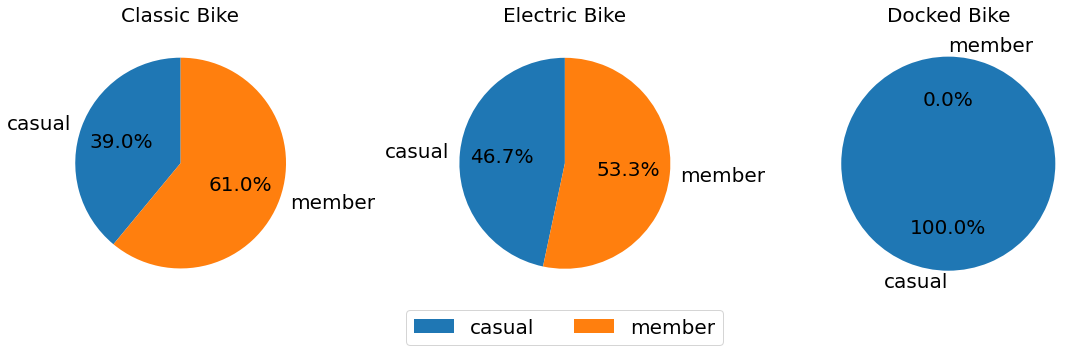

In [29]:
data_31 = df_all.groupby(['rideable_type','member_casual']).ride_id.count().reset_index()
display(data_31)

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15, 5))

colors = ['tab:blue', 'tab:orange']

ax1.pie(data_31.loc[0:1, 'ride_id'], labels = data_31.loc[0:1, 'member_casual'], 
        autopct='%1.01f%%', startangle=90,colors=colors, textprops={'fontsize': 20})
ax2.pie(data_31.loc[4:5, 'ride_id'], labels = data_31.loc[4:5, 'member_casual'], 
        autopct='%1.01f%%', startangle=90,colors=colors, textprops={'fontsize': 20})
ax3.pie(data_31.loc[2:3, 'ride_id'], labels = data_31.loc[2:3, 'member_casual'],
        autopct='%1.01f%%', startangle=90,colors=colors, textprops={'fontsize': 20})


ax1.set_title('Classic Bike', fontsize=20)
ax2.set_title('Electric Bike', fontsize=20)
ax3.set_title('Docked Bike', fontsize=20)


ax1.axis('equal')
ax2.axis('equal')
ax3.axis('equal')

ax2.legend(loc='center', bbox_to_anchor=(0.5, -0.1), ncol=2, fontsize=20)

plt.tight_layout()
plt.show()

In [30]:
#3.2 Comparing the monthly behavior bike usage  between members and casual users.

df_all.month.value_counts()

July         811796
August       794950
September    747305
June         719737
October      624076
May          524817
November     356175
April        333081
December     244996
March        225985
January       95743
February      48654
Name: month, dtype: int64

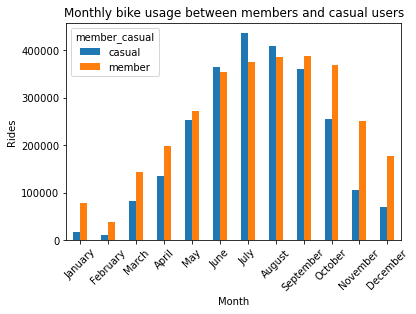

In [31]:
pd.pivot_table(df_all, values = 'ride_id', 
               index ='month', columns = ['member_casual'], aggfunc = 'count', sort = False ).plot(kind='bar')

plt.title('Monthly bike usage between members and casual users')
plt.xlabel('Month')
plt.ylabel('Rides')
plt.xticks(rotation=45)
plt.show()

In [32]:
data_32 = df_all[['month', 'member_casual', 'duration_in_mins', 'rideable_type', 'ride_id']]
data_32.head()

,month,member_casual,duration_in_mins,rideable_type,ride_id
0,January,member,10.416667,electric_bike,E19E6F1B8D4C42ED
1,January,member,4.066667,electric_bike,DC88F20C2C55F27F
2,January,member,1.333333,electric_bike,EC45C94683FE3F27
3,January,member,11.700000,electric_bike,4FA453A75AE377DB
4,January,casual,0.716667,electric_bike,BE5E8EB4E7263A0B


In [33]:
data_32.rideable_type.unique()

array(['electric_bike', 'classic_bike', 'docked_bike'], dtype=object)

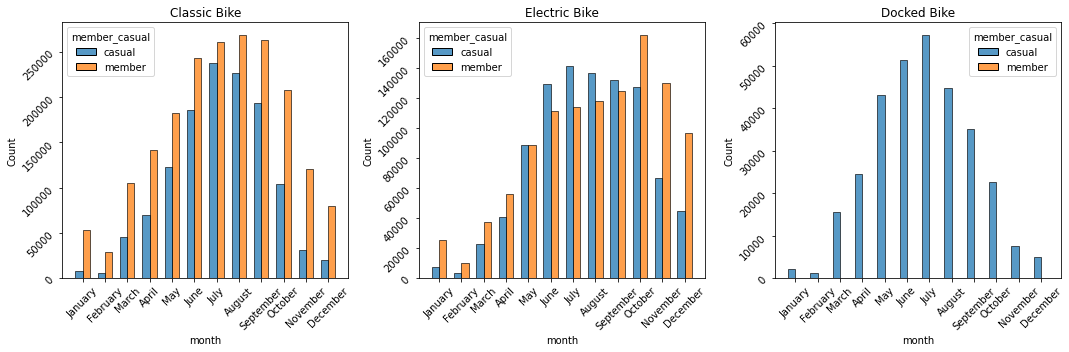

In [34]:
fig_32, (ax_cl_bike_32, ax_el_bike_32, ax_doc_bike_32) = plt.subplots(1,3,figsize=(15, 5))

colors = ['tab:blue', 'tab:orange']

sns.histplot(data_32[data_32.rideable_type=='classic_bike'], x='month', ax = ax_cl_bike_32, hue='member_casual',
             hue_order = ['casual', 'member'], palette=colors, shrink=0.65, multiple='dodge')

sns.histplot(data_32[data_32.rideable_type=='electric_bike'], x='month', ax = ax_el_bike_32, hue='member_casual',
             hue_order = ['casual', 'member'], palette=colors, shrink=0.65, multiple='dodge')

sns.histplot(data_32[data_32.rideable_type=='docked_bike'], x='month', ax = ax_doc_bike_32, hue='member_casual',
             hue_order = ['casual', 'member'], palette=colors, shrink=0.65, multiple='dodge')

ax_cl_bike_32.tick_params(labelrotation=45)
ax_el_bike_32.tick_params(labelrotation=45)
ax_doc_bike_32.tick_params(labelrotation=45)

ax_cl_bike_32.set_title('Classic Bike')
ax_el_bike_32.set_title('Electric Bike')
ax_doc_bike_32.set_title('Docked Bike')

plt.tight_layout()
plt.show()

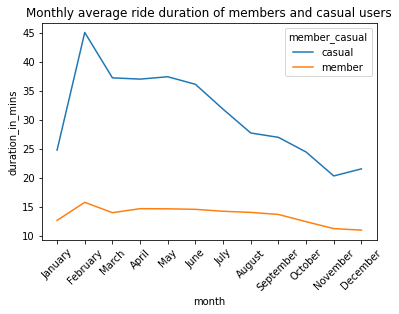

In [206]:
monthly_avg_ride_duration = df_all.groupby(['month', 'member_casual']).duration_in_mins.mean().reset_index()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthly_avg_ride_duration = monthly_avg_ride_duration.sort_values(by='month', key=lambda x: pd.Categorical(x, categories=month_order, ordered=True))
monthly_avg_ride_duration.reset_index(inplace = True)
monthly_avg_ride_duration

sns.lineplot(x='month', y = 'duration_in_mins', data=monthly_avg_ride_duration, hue = 'member_casual')

plt.title('Monthly average ride duration of members and casual users')
plt.xticks(rotation = 45)

plt.show()

In [207]:
df_all.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration_in_mins,dayname,month,week_of_year,route
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,UNKONWN,UNKONWN,41.900341,-87.696743,41.89,-87.72,member,10.416667,Saturday,January,3,From California Ave & Cortez St To UNKONWN
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,UNKONWN,UNKONWN,41.900333,-87.696707,41.90,-87.69,member,4.066667,Wednesday,January,4,From California Ave & Cortez St To UNKONWN
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,UNKONWN,UNKONWN,41.900313,-87.696643,41.90,-87.70,member,1.333333,Thursday,January,3,From California Ave & Cortez St To UNKONWN
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,UNKONWN,UNKONWN,41.900399,-87.696662,41.92,-87.69,member,11.700000,Thursday,January,1,From California Ave & Cortez St To UNKONWN
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,UNKONWN,UNKONWN,41.900326,-87.696697,41.90,-87.70,casual,0.716667,Saturday,January,3,From California Ave & Cortez St To UNKONWN


<AxesSubplot:xlabel='dayname', ylabel='duration_in_mins'>

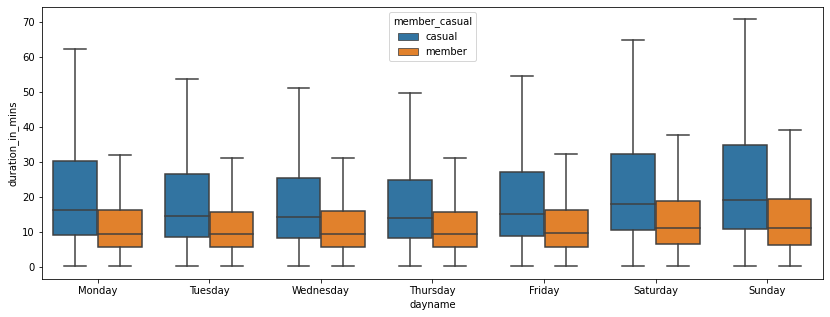

In [212]:
plt.figure(figsize=(14, 5))
sns.boxplot(data = df_all, x='dayname', y='duration_in_mins',hue='member_casual', 
            hue_order = ['casual','member'],dodge=True, showfliers = False,
            order= weekday_order
           )


In [36]:
df_322 = df_all.groupby(['month', 'member_casual', 'rideable_type']).duration_in_mins.mean().reset_index()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

df_322 = df_322.sort_values(by='month', key=lambda x: pd.Categorical(x, categories=month_order, ordered=True))
df_322.reset_index(inplace = True)
df_322

,index,month,member_casual,rideable_type,duration_in_mins
0,25,January,member,electric_bike,11.869760
1,24,January,member,docked_bike,2.633333
2,23,January,member,classic_bike,12.972251
3,22,January,casual,electric_bike,14.831761
4,21,January,casual,docked_bike,70.513316
...,...,...,...,...,...
56,11,December,casual,docked_bike,83.810650
57,12,December,casual,electric_bike,14.071599
58,13,December,member,classic_bike,11.677638
59,14,December,member,electric_bike,10.322570


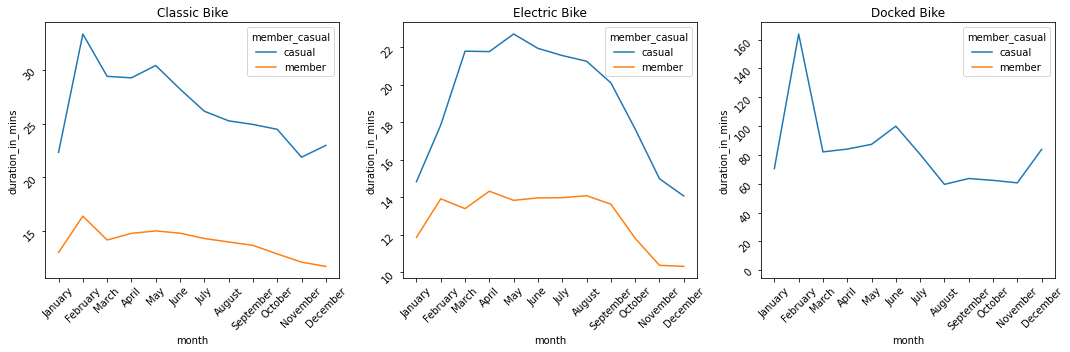

In [37]:
fig_322, (ax_322_cl, ax_322_el, ax_322_doc) = plt.subplots(1,3,figsize=(15, 5))

sns.lineplot(x='month', y = 'duration_in_mins', data=df_322[df_322.rideable_type=='classic_bike'], hue = 'member_casual',
             hue_order = ['casual', 'member'], ax = ax_322_cl)

sns.lineplot(x='month', y = 'duration_in_mins', data=df_322[df_322.rideable_type=='electric_bike'], hue = 'member_casual',
             hue_order = ['casual', 'member'], ax = ax_322_el)

sns.lineplot(x='month', y = 'duration_in_mins', data=df_322[df_322.rideable_type=='docked_bike'], hue = 'member_casual',
             hue_order = ['casual', 'member'], ax = ax_322_doc)

ax_322_cl.tick_params(labelrotation=45)
ax_322_el.tick_params(labelrotation=45)
ax_322_doc.tick_params(labelrotation=45)

ax_322_cl.set_title('Classic Bike')
ax_322_el.set_title('Electric Bike')
ax_322_doc.set_title('Docked Bike')

plt.tight_layout()
plt.show()



In [38]:
#3.3 Weekday and weekend usages between members and casual users
pd.pivot_table(df_all, values = 'ride_id', 
               index ='dayname', columns = ['member_casual'], aggfunc = 'count', sort = False)

member_casual,casual,member
dayname,,
Saturday,551208,426879
Wednesday,275840,471795
Thursday,282902,446341
Monday,283083,411192
Sunday,475143,370645
Friday,359658,440987
Tuesday,271358,460284


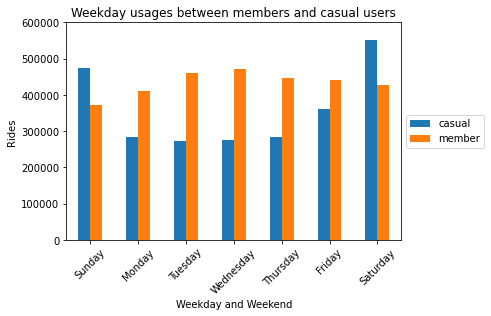

In [39]:
weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

pd.pivot_table(df_all, values = 'ride_id', 
               index ='dayname', columns = ['member_casual'], 
               aggfunc = 'count', sort = False ).loc[weekday_order].plot(kind='bar')

plt.title('Weekday usages between members and casual users')

plt.xlabel('Weekday and Weekend')
plt.ylabel('Rides')
plt.ylim(0, 600000)
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [40]:
df_33 = df_all[['dayname', 'member_casual','rideable_type','duration_in_mins']]
weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']


df_33 = df_33.sort_values(by='dayname', key=lambda x: pd.Categorical(x, categories=weekday_order, ordered=True))
df_33

,dayname,member_casual,rideable_type,duration_in_mins
2014224,Sunday,member,electric_bike,56.350000
4663926,Sunday,member,classic_bike,2.116667
2388880,Sunday,member,electric_bike,6.183333
788644,Sunday,casual,electric_bike,11.483333
788645,Sunday,casual,classic_bike,38.300000
...,...,...,...,...
2375029,Saturday,casual,classic_bike,6.616667
2375041,Saturday,member,classic_bike,7.216667
2375046,Saturday,member,electric_bike,15.100000
4670351,Saturday,casual,docked_bike,13.750000


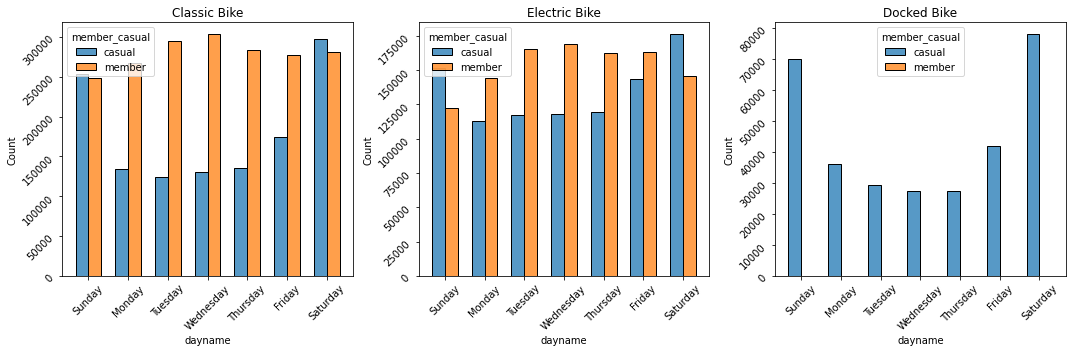

In [41]:
fig_33, (ax_33_cl, ax_33_el, ax_33_doc) = plt.subplots(1,3,figsize=(15, 5))

colors = ['tab:blue', 'tab:orange']

sns.histplot(df_33[df_33.rideable_type=='classic_bike'], x='dayname', ax = ax_33_cl, hue='member_casual',
             hue_order = ['casual', 'member'], palette=colors, shrink=0.65, multiple='dodge')

sns.histplot(df_33[df_33.rideable_type=='electric_bike'], x='dayname', ax = ax_33_el, hue='member_casual',
             hue_order = ['casual', 'member'], palette=colors, shrink=0.65, multiple='dodge')

sns.histplot(df_33[df_33.rideable_type=='docked_bike'], x='dayname', ax = ax_33_doc, hue='member_casual',
             hue_order = ['casual', 'member'], palette=colors, shrink=0.65, multiple='dodge')

ax_33_cl.tick_params(labelrotation=45)
ax_33_el.tick_params(labelrotation=45)
ax_33_doc.tick_params(labelrotation=45)

ax_33_cl.set_title('Classic Bike')
ax_33_el.set_title('Electric Bike')
ax_33_doc.set_title('Docked Bike')

plt.tight_layout()
plt.show()

,dayname,member_casual,duration_in_mins
6,Sunday,casual,35.715880
7,Sunday,member,15.464170
2,Monday,casual,30.592186
3,Monday,member,13.089327
10,Tuesday,casual,26.975518
11,Tuesday,member,12.705112
12,Wednesday,casual,26.488013
13,Wednesday,member,12.762511
8,Thursday,casual,26.300864
9,Thursday,member,12.663931


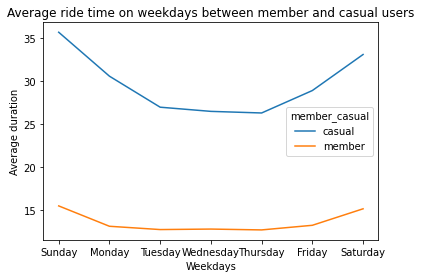

In [42]:
#3.3.2
# Take a look of the relationship between average duration and weekdays by users
weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

weekday_avg_ride_duration = df_all.groupby(['dayname','member_casual']).duration_in_mins.mean().reset_index()
weekday_avg_ride_duration = weekday_avg_ride_duration.sort_values(by = 'dayname', 
                                      key = lambda x: pd.Categorical(x, categories = weekday_order, ordered=True)
                                     )
display(weekday_avg_ride_duration)

sns.lineplot(x='dayname', y='duration_in_mins', data=weekday_avg_ride_duration, hue='member_casual')

plt.title('Average ride time on weekdays between member and casual users')
plt.ylabel('Average duration')
plt.xlabel('Weekdays')

plt.show()

In [43]:
#3.3.2 wAvg ride duration of ridable type of member and casual in weekday
df_332 = df_33.groupby(['dayname','rideable_type', 'member_casual']).duration_in_mins.mean().unstack(1).unstack().copy()

df_332.columns = ['_'.join(col).strip() for col in df_332.columns.values]

weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df_332 = df_332.sort_values('dayname', key = lambda x: pd.Categorical(x, categories=weekday_order, ordered=True))
df_332

,classic_bike_casual,classic_bike_member,docked_bike_casual,docked_bike_member,electric_bike_casual,electric_bike_member
dayname,,,,,,
Sunday,29.973195,15.872200,83.630915,NaN,23.214865,14.636969
Monday,26.951482,13.507659,76.069847,NaN,20.329632,12.317337
Tuesday,24.145921,13.103599,72.562396,NaN,18.572653,11.995726
Wednesday,23.270912,13.116180,77.863537,2.633333,18.103315,12.127475
Thursday,23.006889,13.000599,78.655238,NaN,18.017838,12.074106
Friday,24.860057,13.500059,79.918194,NaN,18.984715,12.696853
Saturday,28.356893,15.540852,77.022679,NaN,21.737123,14.327833


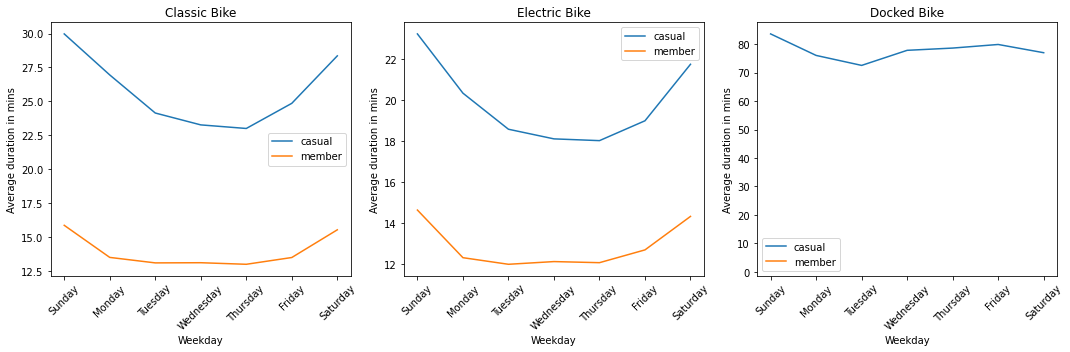

In [44]:
fig_332, axes = plt.subplots(1,3, figsize = (15,5), sharex=True)

sns.lineplot(data=df_332, x=df_332.index, y='classic_bike_casual', ax = axes[0], label = 'casual')
sns.lineplot(data=df_332, x=df_332.index, y='classic_bike_member', ax = axes[0], label = 'member')

axes[0].tick_params(axis='x', rotation=45)
axes[0].set_xlabel('Weekday')
axes[0].set_ylabel('Average duration in mins')
axes[0].set_title('Classic Bike')
axes[0].legend()

sns.lineplot(data=df_332, x=df_332.index, y='electric_bike_casual', ax = axes[1], label = 'casual')
sns.lineplot(data=df_332, x=df_332.index, y='electric_bike_member', ax = axes[1], label = 'member')

axes[1].tick_params(axis='x', rotation=45)
axes[1].set_xlabel('Weekday')
axes[1].set_ylabel('Average duration in mins')
axes[1].set_title('Electric Bike')
axes[1].legend()

sns.lineplot(data=df_332, x=df_332.index, y='docked_bike_casual', ax = axes[2], label = 'casual')
sns.lineplot(data=df_332, x=df_332.index, y='docked_bike_member', ax = axes[2], label = 'member')

axes[2].tick_params(axis='x', rotation=45)
axes[2].set_xlabel('Weekday')
axes[2].set_ylabel('Average duration in mins')
axes[2].set_title('Docked Bike')
axes[2].legend()

plt.tight_layout()
plt.show()

In [45]:
#3.4 Comapare them hourly

In [46]:
df_34 = df_all[['month','dayname','duration_in_mins','started_at','rideable_type','member_casual']].copy()

In [47]:
df_34

,month,dayname,duration_in_mins,started_at,rideable_type,member_casual
0,January,Saturday,10.416667,2021-01-23 16:14:19,electric_bike,member
1,January,Wednesday,4.066667,2021-01-27 18:43:08,electric_bike,member
2,January,Thursday,1.333333,2021-01-21 22:35:54,electric_bike,member
3,January,Thursday,11.700000,2021-01-07 13:31:13,electric_bike,member
4,January,Saturday,0.716667,2021-01-23 02:24:02,electric_bike,casual
...,...,...,...,...,...,...
5595058,December,Sunday,19.216667,2021-12-12 13:36:55,electric_bike,casual
5595059,December,Monday,7.016667,2021-12-06 19:37:50,electric_bike,member
5595060,December,Thursday,8.283333,2021-12-02 08:57:04,electric_bike,member
5595061,December,Monday,14.216667,2021-12-13 09:00:26,electric_bike,member


In [48]:
df_34['hour'] = df_34.started_at.dt.hour

bin_edges = range(0,25,1)
df_34['start_period'] = pd.cut(df_34.hour,bin_edges, right=False)

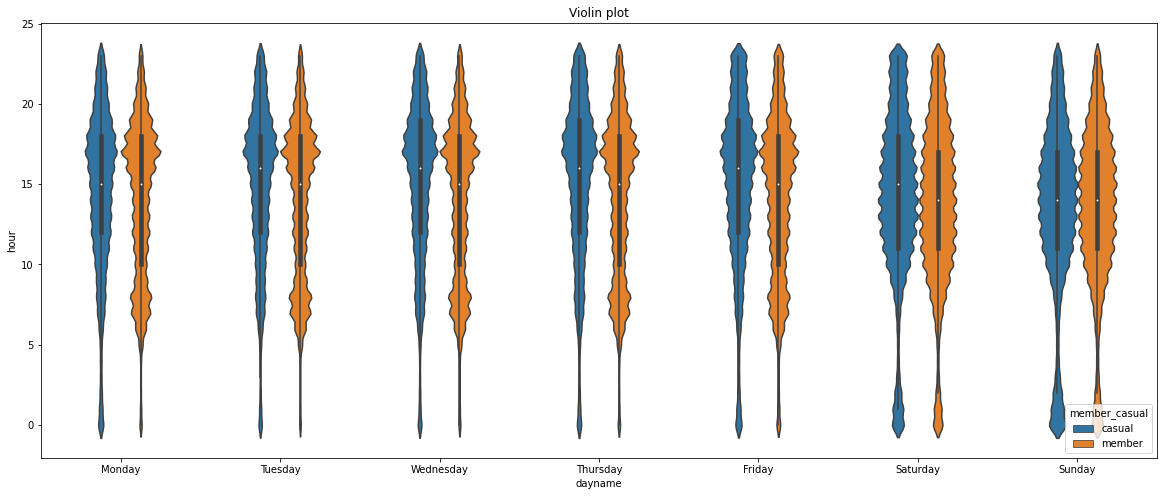

In [49]:
plt.figure(figsize=(20, 8))
sns.violinplot(data=df_34,
            x="dayname",
            y="hour",
            hue="member_casual",
            hue_order=['casual','member'],
            dodge=True,   # separate plots of different colors
            width=0.5,    # width of plots
            order = [ "Monday", "Tuesday", 'Wednesday','Thursday','Friday',"Saturday", "Sunday"],
            palette = None,
       )

plt.title("Violin plot")
plt.show()

In [50]:
# inter quater range from Mon to Fri is difference. 
# THe demand for casual users on Weekends increase a lot compaing the demand on weekdays.

In [75]:
#3.4  heatmap for hours

In [73]:
df_34.sort_values('dayname', key = lambda x: pd.Categorical(x, categories=weekday_order, ordered=True))

,month,dayname,duration_in_mins,started_at,rideable_type,member_casual,hour,start_period
2014224,July,Sunday,56.350000,2021-07-11 14:14:23,electric_bike,member,14,"[14, 15)"
4663926,October,Sunday,2.116667,2021-10-10 17:14:30,classic_bike,member,17,"[17, 18)"
2388880,July,Sunday,6.183333,2021-07-25 21:04:33,electric_bike,member,21,"[21, 22)"
788644,May,Sunday,11.483333,2021-05-30 15:30:27,electric_bike,casual,15,"[15, 16)"
788645,May,Sunday,38.300000,2021-05-30 14:22:26,classic_bike,casual,14,"[14, 15)"
...,...,...,...,...,...,...,...,...
2375029,July,Saturday,6.616667,2021-07-03 15:53:03,classic_bike,casual,15,"[15, 16)"
2375041,July,Saturday,7.216667,2021-07-31 18:27:49,classic_bike,member,18,"[18, 19)"
2375046,July,Saturday,15.100000,2021-07-31 09:22:23,electric_bike,member,9,"[9, 10)"
4670351,October,Saturday,13.750000,2021-10-23 12:34:28,docked_bike,casual,12,"[12, 13)"


<AxesSubplot:xlabel='dayname', ylabel='hour'>

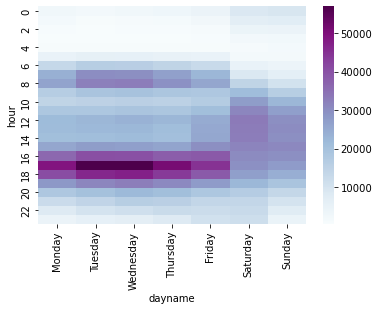

In [88]:
#member heatmap vs hours
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_34_member = df_34[df_34.member_casual == 'member'].groupby(['hour','dayname']).hour.count().unstack().reindex(columns = weekday_order)
sns.heatmap(df_34_member, cmap='BuPu')

<AxesSubplot:xlabel='dayname', ylabel='hour'>

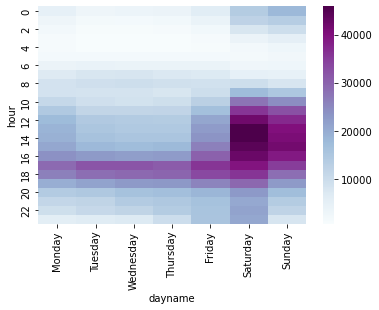

In [89]:
#casual heatmap vs hours
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_34_member = df_34[df_34.member_casual == 'casual'].groupby(['hour','dayname']).hour.count().unstack().reindex(columns = weekday_order)
sns.heatmap(df_34_member, cmap='BuPu')

In [90]:
# You can tell that casual users perfered to ride bike on weekend than on weekdays

In [92]:
#3.5 most popular route
df_all['route'] = 'From ' + df_all['start_station_name'] + ' To ' + df_all['end_station_name']

In [104]:
df_35 = df_all.groupby(['member_casual','route']).agg({'route':'count', 'duration_in_mins':['mean','median']})

In [116]:
#member top 10 route
df_35.loc['member'].columns

MultiIndex([(           'route',  'count'),
            ('duration_in_mins',   'mean'),
            ('duration_in_mins', 'median')],
           )

In [122]:
df_35.loc['member'].sort_values(('route',  'count'), ascending=False).iloc[1:11]

route duration_in_mins  \
                                                   count             mean   
route                                                                       
From Ellis Ave & 60th St To Ellis Ave & 55th St     4082         5.851523   
From Ellis Ave & 55th St To Ellis Ave & 60th St     3652         5.884406   
From Ellis Ave & 60th St To University Ave & 57...  3109         5.591970   
From University Ave & 57th St To Ellis Ave & 60...  3010         5.217226   
From Calumet Ave & 33rd St To State St & 33rd St    1989         4.053410   
From State St & 33rd St To Calumet Ave & 33rd St    1954         4.441795   
From University Ave & 57th St To UNKONWN            1954        12.663195   
From Loomis St & Lexington St To Morgan St & Po...  1860         5.482079   
From Ellis Ave & 60th St To UNKONWN                 1796         7.734697   
From Morgan St & Polk St To Loomis St & Lexingt...  1653         6.185229   

                                                              
                                                      median  
route                                                         
From Ellis Ave & 60th St To Ellis Ave & 55th St     4.600000  
From Ellis Ave & 55th St To Ellis Ave & 60th St     4.766667  
From Ellis Ave & 60th St To University Ave & 57...  3.833333  
From University Ave & 57th St To Ellis Ave & 60...  4.000000  
From Calumet Ave & 33rd St To State St & 33rd St    3.516667  
From State St & 33rd St To Calumet Ave & 33rd St    3.866667  
From University Ave & 57th St To UNKONWN            4.358333  
From Loomis St & Lexington St To Morgan St & Po...  4.625000  
From Ellis Ave & 60th St To UNKONWN                 3.833333  
From Morgan St & Polk St To Loomis St & Lexingt...  5.000000

In [127]:
member_routes_name = df_35.loc['member'].sort_values(('route',  'count'), ascending=False).iloc[1:11].index.values

In [193]:
df_35_member_routes = df_all.query('member_casual == "member" and route.isin(@member_routes_name)')

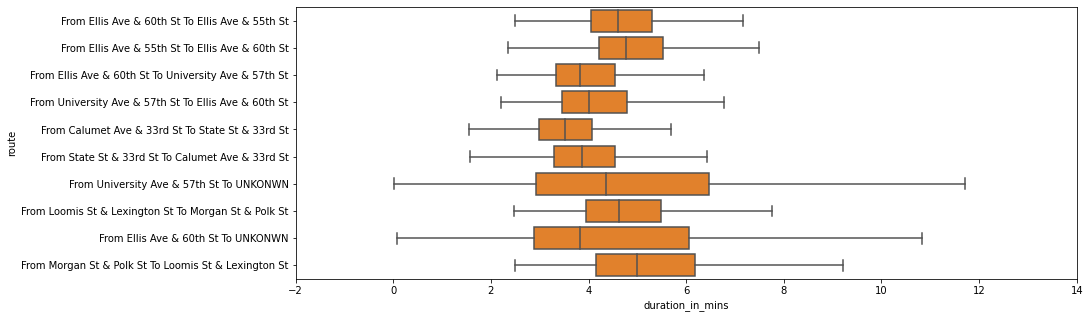

In [197]:
plt.figure(figsize=(14, 5))
sns.boxplot(data=df_35_member_routes, 
            y='route', x='duration_in_mins',dodge=True,
           order=member_routes_name,
           showfliers = False,
           color = 'tab:orange')

plt.xlim(-2,14)


plt.show()

In [199]:
#casual users top10 routes
df_35.loc['casual'].sort_values(('route',  'count'), ascending=False).iloc[1:11]

route duration_in_mins  \
                                                    count             mean   
route                                                                        
From Streeter Dr & Grand Ave To Streeter Dr & G...  11081        51.513871   
From Millennium Park To Millennium Park              5818        52.614266   
From Michigan Ave & Oak St To Michigan Ave & Oa...   5640        56.148061   
From Lake Shore Dr & Monroe St To Lake Shore Dr...   4503        46.497306   
From Buckingham Fountain To Buckingham Fountain      3336        61.812230   
From Streeter Dr & Grand Ave To Millennium Park      3309        35.177032   
From Theater on the Lake To Theater on the Lake      3023        55.354835   
From DuSable Lake Shore Dr & Monroe St To DuSab...   2958        43.547459   
From Montrose Harbor To Montrose Harbor              2932        60.863978   
From Millennium Park To Streeter Dr & Grand Ave      2927        53.095166   

                                                               
                                                       median  
route                                                          
From Streeter Dr & Grand Ave To Streeter Dr & G...  38.983333  
From Millennium Park To Millennium Park             40.616667  
From Michigan Ave & Oak St To Michigan Ave & Oa...  47.016667  
From Lake Shore Dr & Monroe St To Lake Shore Dr...  34.616667  
From Buckingham Fountain To Buckingham Fountain     40.116667  
From Streeter Dr & Grand Ave To Millennium Park     25.383333  
From Theater on the Lake To Theater on the Lake     40.316667  
From DuSable Lake Shore Dr & Monroe St To DuSab...  32.700000  
From Montrose Harbor To Montrose Harbor             44.891667  
From Millennium Park To Streeter Dr & Grand Ave     32.116667

In [195]:
casual_routes_name = df_35.loc['casual'].sort_values(('route',  'count'), ascending=False).iloc[1:11].index.values

In [201]:
df_35_casual_routes = df_all.query('member_casual == "casual" and route.isin(@casual_routes_name)')

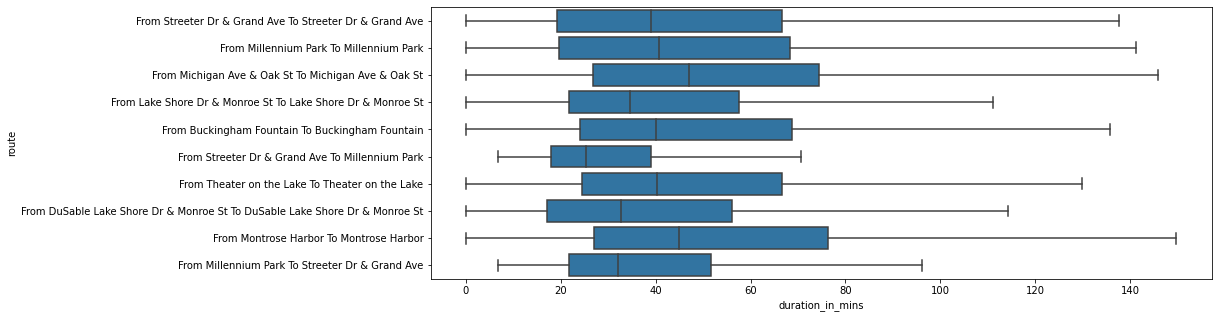

In [204]:
plt.figure(figsize=(14, 5))
sns.boxplot(data=df_35_casual_routes, 
            y='route', x='duration_in_mins',dodge=True,
           order=casual_routes_name,
           showfliers = False,
           color = 'tab:blue')

plt.show()